Importação de bibliotecas


In [3]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd

Extensão TensorBoard

In [5]:
load_ext tensorboard

Definição do diretório de logs para TensorBoard

In [6]:
logdir='log'

Carregamento e preparação dos dados MNIST

In [9]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]


Construção do modelo de Rede Neural Convolucional

In [10]:
model = models.Sequential()
model.add(layers .Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Configuração do TensorBoard

In [11]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

Compilação e treinamento do modelo

In [12]:
from logging import logProcesses
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
          y=train_labels,
          epochs=5,
          validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8986 - loss: 0.3308 - val_accuracy: 0.9761 - val_loss: 0.0743
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9855 - loss: 0.0468 - val_accuracy: 0.9901 - val_loss: 0.0314
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9906 - loss: 0.0301 - val_accuracy: 0.9923 - val_loss: 0.0239
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9928 - loss: 0.0231 - val_accuracy: 0.9901 - val_loss: 0.0300
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9940 - loss: 0.0189 - val_accuracy: 0.9908 - val_loss: 0.0271


Geração de predições

In [13]:
y_true=test_labels
y_pred=model.predict(test_images)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Re-definição das classes

In [15]:
classes=[0,1,2,3,4,5,6,7,8,9]

Gerando a Matriz de Confusão

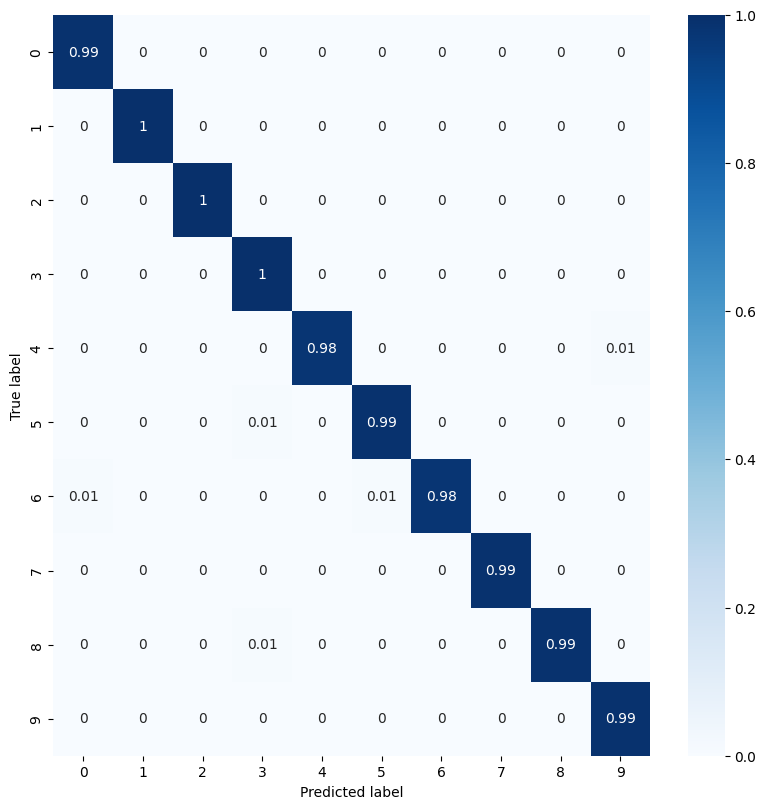

In [18]:
# Previsões para as classes (de probabilidades para índices inteiros)
y_pred_classes = np.argmax(y_pred, axis=1)

# Matriz de confusão
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred_classes).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

# Criação do DataFrame para plotagem
con_mat_df = pd.DataFrame(con_mat_norm,
                          index=classes,
                          columns=classes)

# Plotagem da matriz de confusão
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


Cálculo da Acurácia:

Acurácia: 0.99


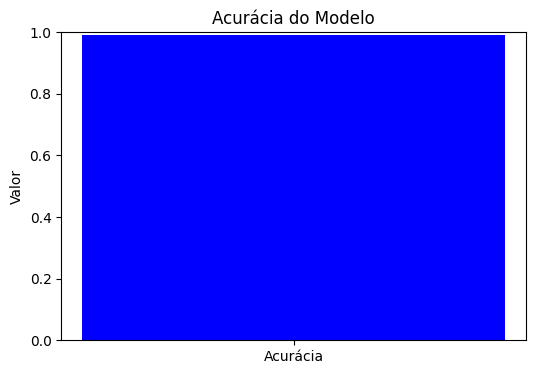

In [21]:
# Cálculo da acurácia
total = con_mat.sum()  # Soma de todos os elementos da matriz de confusão
acuracia = np.trace(con_mat) / total  # Soma da diagonal principal (VP + VN) dividido pelo total
print(f"Acurácia: {acuracia:.2f}")

# Gráfico de Acurácia
plt.figure(figsize=(6, 4))
plt.bar(['Acurácia'], [acuracia], color='blue')
plt.ylim(0, 1)
plt.ylabel('Valor')
plt.title('Acurácia do Modelo')
plt.show()



Cálculo da Sensibilidade(Recall):

Classe 0 - Sensibilidade: 0.99
Classe 1 - Sensibilidade: 1.00
Classe 2 - Sensibilidade: 1.00
Classe 3 - Sensibilidade: 1.00
Classe 4 - Sensibilidade: 0.98
Classe 5 - Sensibilidade: 0.99
Classe 6 - Sensibilidade: 0.98
Classe 7 - Sensibilidade: 0.99
Classe 8 - Sensibilidade: 0.99
Classe 9 - Sensibilidade: 0.99


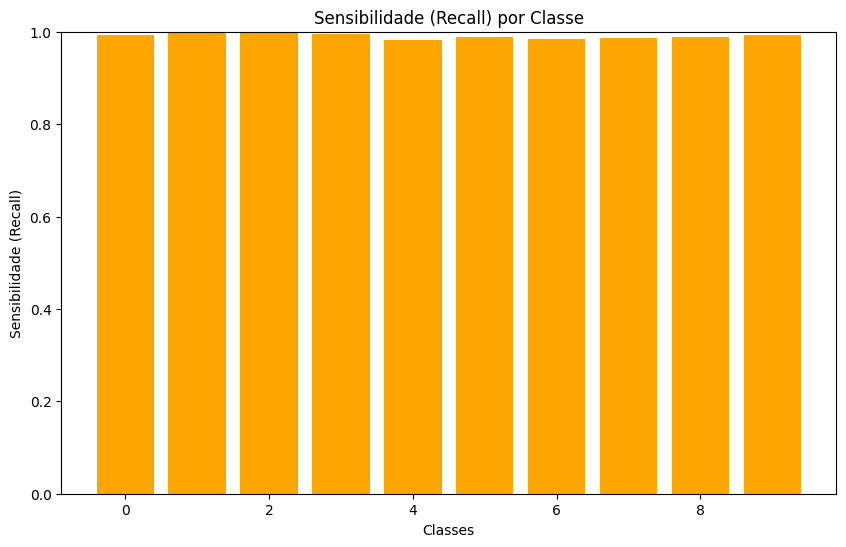

In [23]:
# Cálculo da sensibilidade (recall) por classe
sensibilidade = []
for i in range(len(classes)):
    vp = con_mat[i, i]  # Verdadeiros Positivos
    fn = np.sum(con_mat[i, :]) - vp  # Falsos Negativos
    recall = vp / (vp + fn) if (vp + fn) != 0 else 0
    sensibilidade.append(recall)
    print(f"Classe {classes[i]} - Sensibilidade: {recall:.2f}")


# Gráfico de Sensibilidade por Classe
plt.figure(figsize=(10, 6))
plt.bar(classes, sensibilidade, color='orange')
plt.ylim(0, 1)
plt.xlabel('Classes')
plt.ylabel('Sensibilidade (Recall)')
plt.title('Sensibilidade (Recall) por Classe')
plt.show()


Cálculo do F-Score:

Classe 0 - F-Score: 0.99
Classe 1 - F-Score: 1.00
Classe 2 - F-Score: 0.99
Classe 3 - F-Score: 0.99
Classe 4 - F-Score: 0.99
Classe 5 - F-Score: 0.99
Classe 6 - F-Score: 0.99
Classe 7 - F-Score: 0.99
Classe 8 - F-Score: 0.99
Classe 9 - F-Score: 0.99


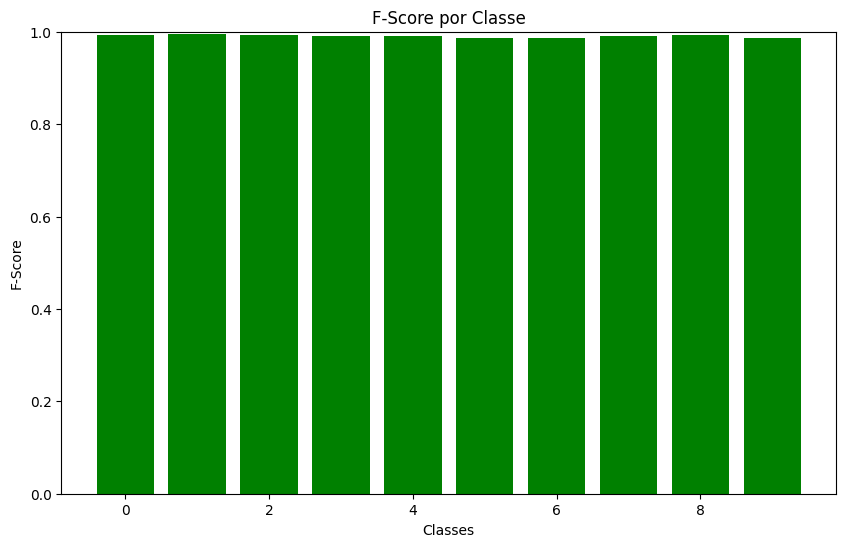

In [25]:
# Cálculo do F-Score por classe
f_scores = []
for i in range(len(classes)):
    vp = con_mat[i, i]  # Verdadeiros Positivos
    fp = np.sum(con_mat[:, i]) - vp  # Falsos Positivos
    fn = np.sum(con_mat[i, :]) - vp  # Falsos Negativos

    precisao = vp / (vp + fp) if (vp + fp) != 0 else 0
    recall = vp / (vp + fn) if (vp + fn) != 0 else 0

    f_score = 2 * (precisao * recall) / (precisao + recall) if (precisao + recall) != 0 else 0
    f_scores.append(f_score)
    print(f"Classe {classes[i]} - F-Score: {f_score:.2f}")

# Gráfico de F-Score por Classe
plt.figure(figsize=(10, 6))
plt.bar(classes, f_scores, color='green')
plt.ylim(0, 1)
plt.xlabel('Classes')
plt.ylabel('F-Score')
plt.title('F-Score por Classe')
plt.show()



Cálculo Curva ROC:

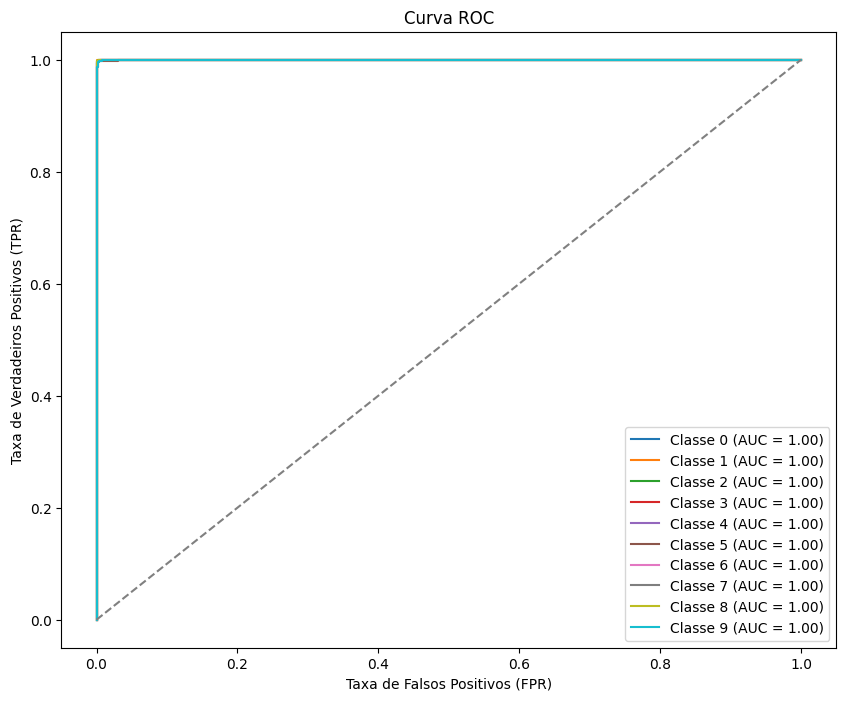

In [28]:
from sklearn.metrics import roc_curve, auc

y_true_one_hot = tf.keras.utils.to_categorical(y_true, num_classes=len(classes))

plt.figure(figsize=(10, 8))
for i in range(len(classes)):
    fpr, tpr, thresholds = roc_curve(y_true_one_hot[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Classe {classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


